# Analisando os dados de crimes registrados na cidade de Chicago 
### para esta análise, os dados foram obtidos através de uma API pública em site oficial do governo americano e por padrão o limite é de 1000 linhas.

In [428]:
import requests
import pandas as pd
import numpy as np 


In [429]:
# Fazendo requisição da API e tratando o formato json:

# Definir a URL base e o limite de linhas:
base_url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"
params = {
    "$limit": 100000  # Limitar a consulta a 10000 registros
}

# Fazendo a requisição:
response = requests.get(base_url, params=params)

# Verificando se a resposta foi bem-sucedida:
if response.status_code == 200:
    data = response.json()  # Obtendo os dados no formato JSON.
    print(f"Dados recebidos: {len(data)} registros")
else:
    print(f"Erro na solicitação: {response.status_code}")


Dados recebidos: 100000 registros


In [430]:
# Criando o DataFrame com o pandas:

dados = pd.DataFrame(data)
dados.tail()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
99995,13521229,JH337163,2024-07-07T14:20:00.000,035XX S PULASKI RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,WAREHOUSE,False,False,...,"{'latitude': '41.829929212', 'longitude': '-87...",14,21569,32,200,28,57,21,167,22
99996,13521362,JH337183,2024-07-07T14:20:00.000,012XX N LARRABEE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,"{'latitude': '41.903996883', 'longitude': '-87...",41,14926,37,108,46,54,14,199,27
99997,13522672,JH338402,2024-07-07T14:12:00.000,014XX N KINGSBURY ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,"{'latitude': '41.906763691', 'longitude': '-87...",16,22620,37,108,46,49,14,199,27
99998,13521226,JH337177,2024-07-07T14:12:00.000,045XX N ST LOUIS AVE,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,...,"{'latitude': '41.963377165', 'longitude': '-87...",2,21849,14,24,20,20,1,9,33
99999,13521295,JH337230,2024-07-07T14:09:00.000,002XX W HILL ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,"{'latitude': '41.902099008', 'longitude': '-87...",41,14926,37,148,46,54,14,51,27


# 1. Entendendo a Estrutura dos Dados

##### Perguntas respondidas nesta sessão:
- Quais são as colunas disponíveis no dataset?
- Qual é o tipo de dado de cada coluna?
- Quantos registros estão no dataset?
- Identifique as 5 primeiras e últimas linhas dos dados (df.head() e df.tail()).
- Há valores ausentes? Quais colunas têm valores nulos?

In [431]:
# consultando as colunas da base: 

dados.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58', ':@computed_region_8hcu_yrd4'],
      dtype='object')

In [432]:
# consultando os tipos de dados:
dados.dtypes

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
:@computed_region_awaf_s7ux    object
:@computed_region_6mkv_f3dw    object
:@computed_region_vrxf_vc4k    object
:@computed_region_bdys_3d7i    object
:@computed_r

In [433]:
# Quantos registros estão no dataset? 
dados.shape

(100000, 31)

In [434]:
# Indicando as 5 primeiras linhas:
dados.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
0,13674104,JH520738,2024-11-23T00:00:00.000,008XX N FRANKLIN ST,0460,BATTERY,SIMPLE,RESTAURANT,False,True,...,"{'latitude': '41.89850165', 'longitude': '-87....",41,14926,37,652,46,54,14,51,27
1,13672074,JH518325,2024-11-23T00:00:00.000,104XX S VERNON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,"{'latitude': '41.704622789', 'longitude': '-87...",30,21861,45,236,43,19,10,256,11
2,13672111,JH518337,2024-11-23T00:00:00.000,010XX N FRANCISCO AVE,0820,THEFT,$500 AND UNDER,HOSPITAL BUILDING / GROUNDS,False,False,...,"{'latitude': '41.900505589', 'longitude': '-87...",10,21560,25,301,49,4,15,64,26
3,13673228,JH518892,2024-11-23T00:00:00.000,051XX S PULASKI RD,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,...,"{'latitude': '41.799808989', 'longitude': '-87...",35,22248,60,792,6,56,13,105,23
4,13671957,JH518181,2024-11-22T23:59:00.000,024XX W FLOURNOY ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"{'latitude': '41.872969906', 'longitude': '-87...",48,21184,29,756,23,28,16,146,28


In [435]:
# Indicando as 5 últimas linhas:
dados.tail()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
99995,13521229,JH337163,2024-07-07T14:20:00.000,035XX S PULASKI RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,WAREHOUSE,False,False,...,"{'latitude': '41.829929212', 'longitude': '-87...",14,21569,32,200,28,57,21,167,22
99996,13521362,JH337183,2024-07-07T14:20:00.000,012XX N LARRABEE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,"{'latitude': '41.903996883', 'longitude': '-87...",41,14926,37,108,46,54,14,199,27
99997,13522672,JH338402,2024-07-07T14:12:00.000,014XX N KINGSBURY ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,"{'latitude': '41.906763691', 'longitude': '-87...",16,22620,37,108,46,49,14,199,27
99998,13521226,JH337177,2024-07-07T14:12:00.000,045XX N ST LOUIS AVE,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,...,"{'latitude': '41.963377165', 'longitude': '-87...",2,21849,14,24,20,20,1,9,33
99999,13521295,JH337230,2024-07-07T14:09:00.000,002XX W HILL ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,"{'latitude': '41.902099008', 'longitude': '-87...",41,14926,37,148,46,54,14,51,27


In [436]:
# Há valores ausentes? Quais colunas possuem valores nulos? 
dados.isnull().sum()

id                               0
case_number                      0
date                             0
block                            0
iucr                             0
primary_type                     0
description                      0
location_description           308
arrest                           0
domestic                         0
beat                             0
district                         0
ward                             0
community_area                   2
fbi_code                         0
x_coordinate                    40
y_coordinate                    40
year                             0
updated_on                       0
latitude                        40
longitude                       40
location                        40
:@computed_region_awaf_s7ux    394
:@computed_region_6mkv_f3dw     40
:@computed_region_vrxf_vc4k    349
:@computed_region_bdys_3d7i    398
:@computed_region_43wa_7qmu    348
:@computed_region_rpca_8um6    347
:@computed_region_d9

# 2. Exploração Básica

#### Perguntas respondidas nesta sessão:

- Quantos tipos diferentes de crimes estão registrados?
- Quais são os 10 crimes mais comuns? 
- Qual é o ano mais antigo e o mais recente dos registros?
- Filtre apenas os crimes que envolvem "HOMICIDE".
- Ordene os crimes por data em ordem decrescente.

In [437]:
# Quantos tipos diferentes de crimes estão registrados nos dados?

diferentes_crimes = dados['primary_type'].nunique()
print(f"Nesta base de dados foram encontrados {diferentes_crimes} crimes de diferente natureza.")

Nesta base de dados foram encontrados 31 crimes de diferente natureza.


In [438]:
# Quais são os 10 crimes mais comuns? 

dados['primary_type'].value_counts().head(10)

primary_type
THEFT                  24395
BATTERY                17622
CRIMINAL DAMAGE        11203
ASSAULT                 9243
MOTOR VEHICLE THEFT     8373
OTHER OFFENSE           6156
DECEPTIVE PRACTICE      5215
ROBBERY                 3634
BURGLARY                3602
WEAPONS VIOLATION       3002
Name: count, dtype: int64

In [439]:
# Antes de mexermos com as datas, vamos formatá-las: 

dados['date'] = dados['date'].astype(str)
dados['date'] = dados ['date'].str[:10]
dados['date'] = pd.to_datetime(dados['date'], format='%Y-%m-%d')

In [440]:
# Qual é o ano do registro mais antigo nos dados?

dados['date'].max()

Timestamp('2024-11-23 00:00:00')

In [441]:
# Qual é o ano do registro mais recente nos dados?

dados['date'].max()

Timestamp('2024-11-23 00:00:00')

In [442]:
# Filtrando apenas os crimes que envolvem HOMICIDE: 

dados[dados['primary_type'] == 'HOMICIDE']

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
77,28491,JH518049,2024-11-22,003XX S CENTRAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,28490,JH517038,2024-11-22,073XX S PHILLIPS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HALLWAY,False,False,...,"{'latitude': '41.761727593', 'longitude': '-87...",43,22538,39,245,37,24,18,213,5
691,28489,JH516373,2024-11-21,043XX W CORTEZ ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,"{'latitude': '41.899809702', 'longitude': '-87...",4,4299,24,99,45,5,16,68,37
1506,28488,JH514810,2024-11-20,024XX S OAKLEY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,"{'latitude': '41.848208417', 'longitude': '-87...",8,14920,33,204,26,43,21,159,25
2017,28487,JH513810,2024-11-19,056XX W LELAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,True,...,"{'latitude': '41.965943379', 'longitude': '-87...",20,21869,15,94,50,48,12,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98224,28247,JH340516,2024-07-09,070XX S MERRILL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,"{'latitude': '41.766768889', 'longitude': '-87...",32,22538,39,152,33,24,18,262,3
98452,28249,JH333745,2024-07-09,012XX S CENTRAL PARK AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,"{'latitude': '41.864341732', 'longitude': '-87...",36,21569,30,33,14,57,21,155,24
99292,28244,JH336465,2024-07-08,028XX S LAWNDALE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,...,"{'latitude': '41.840182454', 'longitude': '-87...",14,21569,32,234,28,57,21,166,22
99631,28243,JH337729,2024-07-08,007XX E 89TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,"{'latitude': '41.732069437', 'longitude': '-87...",31,21546,40,430,35,61,20,248,10


In [443]:
# Ordenando os dados do mais antigo para o mais recente (crescente): 

dados_datas_ordenadas = dados.sort_values(by='date', ascending=True)

dados_datas_ordenadas.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
99999,13521295,JH337230,2024-07-07,002XX W HILL ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,"{'latitude': '41.902099008', 'longitude': '-87...",41,14926,37,148,46,54,14,51,27
99775,13522601,JH338172,2024-07-07,0000X E GARFIELD BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,GAS STATION,False,False,...,"{'latitude': '41.794672085', 'longitude': '-87...",12,22260,7,403,9,10,24,111,20
99776,13521690,JH337567,2024-07-07,013XX N ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,"{'latitude': '41.905319751', 'longitude': '-87...",10,21560,25,302,49,4,7,62,26
99777,13521479,JH337537,2024-07-07,069XX S ASHLAND AVE,2028,NARCOTICS,POSSESS - SYNTHETIC DRUGS,STREET,True,False,...,"{'latitude': '41.767910191', 'longitude': '-87...",17,22257,65,283,31,23,17,7,17
99778,13521788,JH337618,2024-07-07,057XX W NORTH AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,"{'latitude': '41.909342516', 'longitude': '-87...",52,22615,26,565,7,5,6,154,29


# 3. Filtragem e Seleção

#### Perguntas respondidas nesta sessão:

- Quantos crimes ocorreram em uma localização específica, como "STREET"? 
- Quais crimes ocorreram em um distrito específico?
- Filtre registros que envolvam armas de fogo.

In [444]:
# Quantos crimes ocorreram em uma localização específica (neste caso, STREET):
 
crimes_reportados = dados[dados['location_description'] == 'STREET']['id'].count()
print(f'Foram reportados "{crimes_reportados}" crimes desta natureza.')

Foram reportados "27450" crimes desta natureza.


In [445]:
# Quais crimes foram registrados em uma localizacao especifica (neste caso, disrito 001):

crimes_no_distrito = dados[dados['district'] == '001']['id'].count()
print(f'Foram reportados "{crimes_no_distrito}" crimes no distrito selecionado.')

Foram reportados "5957" crimes no distrito selecionado.


In [446]:
# Filtragem de crimes que envolveram uso de arma de fogo: 
uso_arma_de_fogo = dados['description'].str.contains('HANDGUN', case=False, na=False)
total = uso_arma_de_fogo.sum()
print(f'Foram reportadas "{total}" ocorrências envolvendo uso de arma de fogo.')

Foram reportadas "6065" ocorrências envolvendo uso de arma de fogo.


# 4. Agrupamentos e Resumos

#### Perguntas respondidas nesta sessão 

- Qual o total de crimes por dia? 
- Qual é a proporção de crimes violentos versus não violentos?
- Quais são os 5 distritos mais perigosos?
- Qual a média de crimes por mês e qual é o mês mais perigoso.
- Analisaremos os crimes por dia da semana.

In [447]:
# O total de crimes por dia: 
dados.groupby('date')['id'].count()

date
2024-07-07    329
2024-07-08    781
2024-07-09    717
2024-07-10    670
2024-07-11    754
             ... 
2024-11-19    600
2024-11-20    590
2024-11-21    528
2024-11-22    596
2024-11-23      4
Name: id, Length: 140, dtype: int64

In [460]:
# Calculando a quantidade de ocorrências por crimes: 

contagem_de_crimes = dados['primary_type'].value_counts()
contagem_de_crimes

primary_type
THEFT                                24395
BATTERY                              17622
CRIMINAL DAMAGE                      11203
ASSAULT                               9243
MOTOR VEHICLE THEFT                   8373
OTHER OFFENSE                         6156
DECEPTIVE PRACTICE                    5215
ROBBERY                               3634
BURGLARY                              3602
WEAPONS VIOLATION                     3002
NARCOTICS                             2211
CRIMINAL TRESPASS                     1974
CRIMINAL SEXUAL ASSAULT                612
OFFENSE INVOLVING CHILDREN             566
SEX OFFENSE                            425
PUBLIC PEACE VIOLATION                 404
INTERFERENCE WITH PUBLIC OFFICER       282
HOMICIDE                               232
STALKING                               221
ARSON                                  179
PROSTITUTION                           147
CONCEALED CARRY LICENSE VIOLATION       83
INTIMIDATION                            6

In [449]:
# Crimes violentos (consideramos assaltos, delito com crianças, delitos sexuais, estupro):

dados['violent_vs_nonviolent'] = dados['primary_type'].str.contains('ASSAULT|OFFENSE INVOLVING CHILDREN|SEX OFFENSE|CRIMINAL SEXUAL ASSAULT' ,case=False, na=False)
total_violentos = dados['violent_vs_nonviolent'].sum()
print(f'Neste período foram registrados "{total_violentos}" crimes violentos.')


Neste período foram registrados "10846" crimes violentos.


In [450]:
total_crimes = len(dados)
total_nao_violento = total_crimes - total_violentos
print(f'neste período foram registrados "{total_nao_violento}" crimes não violentos.')

neste período foram registrados "89154" crimes não violentos.


In [451]:
prop = total_violentos / total_nao_violento
print(f'A proporção de crimes violentos x não violentos é de: {prop:.2f}')

A proporção de crimes violentos x não violentos é de: 0.12


In [452]:
# Quais são os 5 distritos mais perigosos? 

area_mais_perigosa = dados['community_area'].value_counts()
top_5__areas = area_mais_perigosa.head(5)
print(top_5__areas)

community_area
25    4922
8     4432
28    4365
32    3723
24    3286
Name: count, dtype: int64


In [453]:
# Calculando a média de crimes por mês e definindo o mês mais perigoso 

meses = [7, 8, 9, 10, 11]
nomes_meses = ['Julho', 'Agosto', 'Setembro', 'Outubro','Novembro']

# Calcular os totais de crimes de cada mês em análise:
totais_crimes = {nome: dados[dados['date'].dt.month == mes]['id'].count() 
                 for nome, mes in zip(nomes_meses, meses)}

valor_total_crimes_series = pd.Series(totais_crimes)

media_crimes = valor_total_crimes_series.mean()
print(f'A média de crimes totais é de {media_crimes}')

A média de crimes totais é de 20000.0


In [454]:
valor_total_crimes_series.values

array([18534, 22715, 22625, 21946, 14180])

In [455]:
# analisando os crimes por dia da semana: 

dados['date'] = pd.to_datetime(dados['date'], errors='coerce')
dados['dia_da_semana'] = dados['date'].dt.dayofweek  # 0 = segunda, 6 = domingo
crimes_por_dias = dados.groupby('dia_da_semana')['id'].count()
crimes_por_dias

dia_da_semana
0    14393
1    13923
2    14161
3    14060
4    14840
5    14364
6    14259
Name: id, dtype: int64

In [456]:
# Alterando o index numerico para os dias da semana: 

dias_da_semana = {
    0: 'segunda-feira',
    1: 'terça-feira',
    2: 'quarta-feira',
    3: 'quinta-feira',
    4: 'sexta-feira',
    5: 'sábado',
    6: 'domingo'
}

crimes_por_dias.index = crimes_por_dias.index.map(dias_da_semana)

print(crimes_por_dias)

dia_da_semana
segunda-feira    14393
terça-feira      13923
quarta-feira     14161
quinta-feira     14060
sexta-feira      14840
sábado           14364
domingo          14259
Name: id, dtype: int64


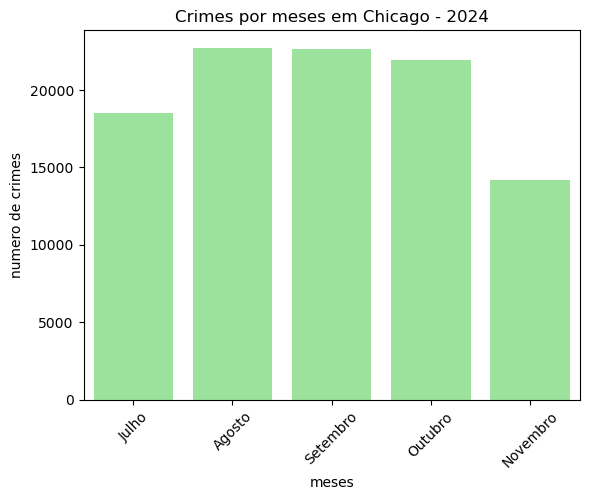

In [457]:
# Total de crimes x mês:

import seaborn as sns
import matplotlib.pyplot as plt

crimes_por_mes = pd.DataFrame({
    'meses': valor_total_crimes_series.index,
    'crimes': valor_total_crimes_series.values})

sns.barplot(x='meses', y='crimes', data = crimes_por_mes, color='lightgreen')
plt.title('Crimes por meses em Chicago - 2024')
plt.ylabel('numero de crimes')
plt.xlabel('meses')
plt.xticks(rotation=45)
plt.show()

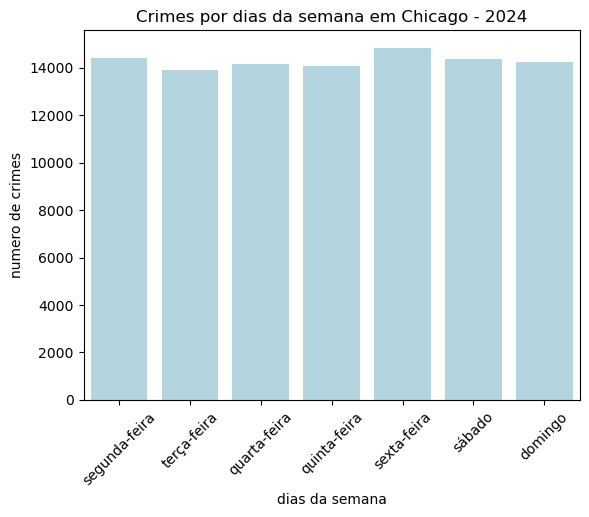

In [458]:
# Total de crimes x dias da semana:

crimes_por_dia_graph = pd.DataFrame({
    'meses': crimes_por_dias.index,
    'crimes': crimes_por_dias.values})

sns.barplot(x='meses', y='crimes', data = crimes_por_dia_graph, color='lightblue')


plt.title('Crimes por dias da semana em Chicago - 2024')
plt.ylabel('numero de crimes')
plt.xlabel('dias da semana')
plt.xticks(rotation=45)
plt.show()

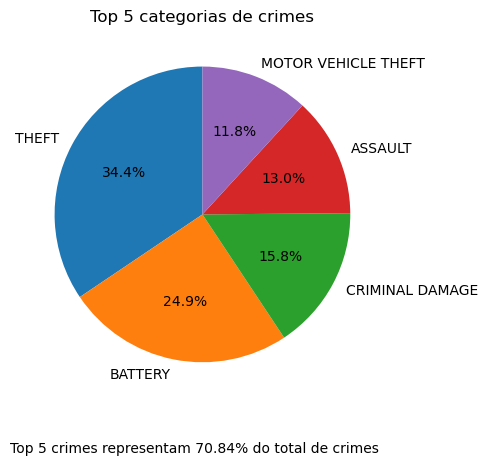

In [485]:
# Top 5 categorias de crimes 
totais_crimes = total_crimes.sum()
top_5_crimes = contagem_de_crimes.head()
soma_top_5 = top_5_crimes.sum()
percentual_top5_crimes = (soma_top_5 / totais_crimes) * 100 

plt.pie(top_5_crimes.values, labels=top_5_crimes.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 categorias de crimes')
plt.figtext(0.5, 0, f'Top 5 crimes representam {percentual_top5_crimes:.2f}% do total de crimes', ha='center', fontsize=10)
plt.show()